In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from copy import deepcopy
%matplotlib inline

In [6]:
data = pd.read_csv('data.csv')
# take a look at the data
data.head()

,physician_id,physician_efficiency,metro_area,physician_working_specialty,physician_gender,physician_credential,physician_med_school,physician_graduation_year,bump_feature,engineered_feature_1,engineered_feature_2,engineered_feature_3,medicare_engineered_1,medicare_engineered_2,medicare_engineered_3,medicare_enginerred_4,medicare_engineered_5,medicare_engineered_6,num_medicare_patients,medicare_patient_hcc_risk_score
0,2,0.92,Chicago,Radiology,M,UNKNOWN,BOSTON UNIVERSITY SCHOOL OF MEDICINE,1995.0,3228,1.132,1.154,7.7,2.50,3,0,2,0,3,1482,2.055
1,3,0.72,Chicago,Urology,M,MD,"LOYOLA UNIVERSITY OF CHICAGO, STRITCH SCHOOL O...",1976.0,1077,1.756,1.736,13.1,4.00,4,4,5,3,4,522,1.398
2,4,1.08,Dallas,Family Practice,F,MD,UNIVERSITY OF TEXAS MEDICAL BRANCH AT GALVESTON,2001.0,6034,1.093,1.086,12.9,2.50,3,3,3,3,1,87,0.800
3,5,0.97,Dallas,Facial Surgery and Otolaryngology,M,MD,BAYLOR COLLEGE OF MEDICINE,1991.0,4098,1.231,1.231,14.2,2.25,2,2,5,1,1,330,1.014
4,6,1.00,Dallas,OB/GYN,F,UNKNOWN,UNIVERSITY OF TEXAS MEDICAL SCHOOL AT SAN ANTONIO,1999.0,4652,1.056,1.056,8.5,4.00,4,5,4,2,5,30,0.806


## Data Quality Check

* Basic Descriptive analysis
* Check outliers
* Check missing value


### 1. Basic Descriptive analysis

In [7]:
# Descriptive analysis
data.describe()

,physician_id,physician_efficiency,physician_graduation_year,bump_feature,engineered_feature_1,engineered_feature_2,engineered_feature_3,medicare_engineered_1,medicare_engineered_2,medicare_engineered_3,medicare_enginerred_4,medicare_engineered_5,medicare_engineered_6,num_medicare_patients,medicare_patient_hcc_risk_score
count,7393.000000,7393.000000,6674.000000,7393.000000,7393.000000,7393.000000,7393.000000,7393.000000,7393.000000,7393.000000,7393.000000,7393.000000,7393.000000,7393.000000,7393.000000
mean,4998.183417,1.056228,1995.449805,4948.712836,1.088763,1.067009,10.071081,2.802573,2.911944,2.647099,2.389287,2.421750,2.792371,495.109022,1.545016
std,2882.632252,0.355256,170.101170,2917.906257,0.409342,0.249731,4.844017,0.829564,0.884700,1.507928,1.679374,1.607064,1.385428,615.225229,0.794146
min,2.000000,0.100000,1954.000000,12.000000,0.047000,0.047000,0.300000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2495.000000,0.860000,1984.000000,2348.000000,0.920000,0.957000,6.100000,2.250000,2.000000,1.000000,1.000000,1.000000,2.000000,150.000000,1.037000
50%,5009.000000,1.010000,1993.000000,4943.000000,1.050000,1.054000,10.000000,2.750000,3.000000,3.000000,2.000000,2.000000,3.000000,317.000000,1.354000
75%,7475.000000,1.200000,2001.000000,7545.000000,1.181000,1.150000,14.100000,3.333000,3.000000,4.000000,4.000000,4.000000,4.000000,594.000000,1.830000
max,10002.000000,2.990000,9999.000000,9951.000000,19.907000,10.783000,29.100000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,7090.000000,8.194000


The table above gives us some interesting information in *physician_graduation_year* and *bump_feature* column. Both of them have very large std. In particular, the maximum of graduation_year is 9999, which is impossible. We will look into these columns in the second part-outliers detection.

(array([777., 946., 891., 749., 711., 517., 459., 366., 309., 254., 217.,
        148., 141., 112.,  89.,  68.,  64.,  56.,  55.,  39.,  33.,  24.,
         22.,  12.,  19.,  20.,  19.,  26.,  17.,  17.,  11.,  11.,  16.,
         10.,   5.,  12.,  10.,   8.,   9.,   8.,   7.,   6.,   9.,   4.,
          8.,   5.,   7.,   8.,   3.,   5.,   8.,   3.,   0.,   1.,   1.,
          2.,   4.,   1.,   3.,   2.,   3.,   3.,   1.,   2.,   2.,   2.,
          2.,   0.,   0.,   0.,   0.,   2.,   2.,   2.,   0.,   0.,   2.,
          1.,   1.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          2.]),
 array([   0. ,   70.9,  141.8,  212.7,  283.6,  354.5,  425.4,  496.3,
         567.2,  638.1,  709. ,  779.9,  850.8,  921.7,  992.6, 1063.5,
        1134.4, 1205.3, 1276.2, 1347.1, 1418. , 1488.9, 1559.8, 1630.7,
        1701.6, 1772.5, 1843.4, 1914.3, 1985.2, 2056.1, 2127. , 2197.9,
        2268.8, 2339.7, 2410.6

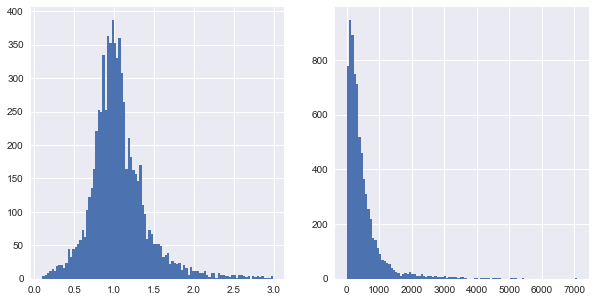

In [8]:
# take a look at the distribution of physiscian_efficiency and num_medicare_patients
fig, ax = plt.subplots(1,2, figsize = (10,5), sharey = False)
ax[0].hist(data['physician_efficiency'], bins = 100)
ax[1].hist(data['num_medicare_patients'], bins = 100)

The distribution looks normal.

### 2. Check missing value

In [13]:
# Check missing value
num_row = data.shape[0]
for i in data.columns:
        temp = data[data[i].isnull()]
        if temp.shape[0] > 0:
            print(i + ' Missing value: ' + str(temp.shape[0]) + '; Percentage: ' +str(temp.shape[0] / num_row))

physician_graduation_year Missing value: 719; Percentage: 0.09725415933991614


Only column *physician_graduation_year* has missing values, accounting about 10% of the data. There are several ways to deal with missing value. As graduation year is a discrete value, so we can impute them with mode.

In [14]:
# get a deep copy of data
data_impute = deepcopy(data)
data_impute['physician_graduation_year'].fillna(data['physician_graduation_year'].mode()[0], inplace = True)

### 3. Check outliers

Text(0.5, 0.98, 'boxplot for physician_graduation_year')

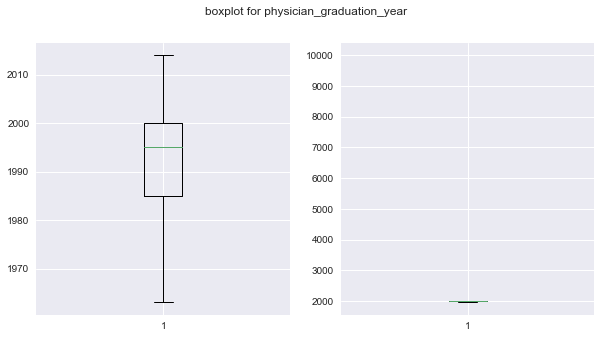

In [15]:
# Check outliers
fig, ax = plt.subplots(1,2, figsize = (10,5))
ax[0].boxplot(data_impute['physician_graduation_year'], showfliers = False)
ax[1].boxplot(data_impute['physician_graduation_year'], showfliers = True)
fig.suptitle('boxplot for physician_graduation_year')

In [16]:
# Check how many outliers graduation year has
up = np.percentile(data_impute['physician_graduation_year'], 99)
print(up)

2010.0


99th percentile of the graduation year is 2011. So we just drop that outlier and check the boxplot again. The plot below shows that we only have one outlier in that column.

{'boxes': [<matplotlib.lines.Line2D at 0x11e539710>],
 'caps': [<matplotlib.lines.Line2D at 0x11e539f98>,
 'fliers': [<matplotlib.lines.Line2D at 0x11e544a58>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x11e5446d8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x11e539898>,
  <matplotlib.lines.Line2D at 0x11e539c18>]}

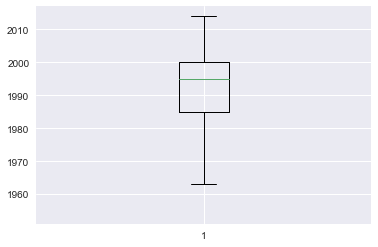

In [17]:
data_impute = data_impute[data_impute['physician_graduation_year'] != 9999]
plt.boxplot(data_impute[data_impute['physician_graduation_year'] != 9999]['physician_graduation_year'], showfliers = True)

After removing the outliers, the boxplot looks good.

Text(0.5, 0.98, 'boxplot for bump_feature')

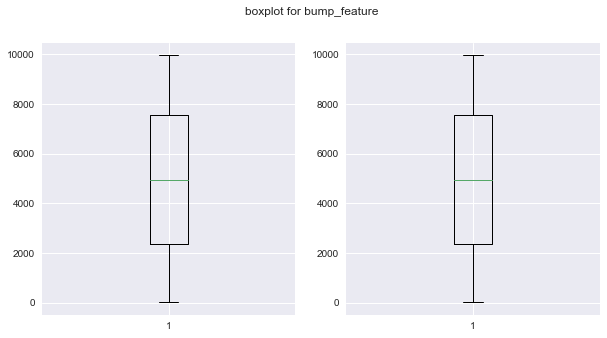

In [18]:
# Check outliers for bump_feature.
fig, ax = plt.subplots(1,2, figsize = (10,5))
ax[0].boxplot(data_impute['bump_feature'], showfliers = False)
ax[1].boxplot(data_impute['bump_feature'], showfliers = True)
fig.suptitle('boxplot for bump_feature')

The boxplot for bump feature looks normal. No outliers are found. 

## Variables Selection

There are several methods to select variables. I will try out two methods to select predictive variables: both-way stepwise regression, Lasso. Before performing the selection, I first transform the data to the format that would enable us to conduct analysis. 

In [19]:
# check the datatype of the data
data_impute.dtypes

physician_id                         int64
physician_efficiency               float64
metro_area                          object
physician_working_specialty         object
physician_gender                    object
physician_credential                object
physician_med_school                object
physician_graduation_year          float64
bump_feature                         int64
engineered_feature_1               float64
engineered_feature_2               float64
engineered_feature_3               float64
medicare_engineered_1              float64
medicare_engineered_2                int64
medicare_engineered_3                int64
medicare_enginerred_4                int64
medicare_engineered_5                int64
medicare_engineered_6                int64
num_medicare_patients                int64
medicare_patient_hcc_risk_score    float64
dtype: object

The categorical columns in our dataset are: ```metro_area, phsician_working_specialty, phsician_gender, phsician_credential, physician_med_school```. Also I drop *physician_id*, as it's just identifier, does not have actual meaning.

In [20]:
data_dummy = data_impute.drop('physician_id', axis = 1)
data_dummy = pd.get_dummies(data_dummy)

In [21]:
data_dummy.shape

(7390, 189)

After convert the categorical data to dummy data, we get 189 columns. Let's start feature selection.

In [22]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
y = data_dummy['physician_efficiency']
x_lst = list(data_dummy.columns)
x_lst.remove('physician_efficiency')
X = data_dummy[x_lst]


In [23]:
# try different alpha and see how many features the model gives
for i in np.linspace(0.001,0.01, 10):
    model_lasso = Lasso(alpha= i).fit(X, y)
    model = SelectFromModel(model_lasso, prefit = True)
    X_new = model.transform(X)
    print(X_new.shape)

/Users/zhenglu/anaconda/lib/python3.6/site-packages/sklearn/utils/__init__.py:93: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(mask.dtype, np.int):


(7390, 16)
(7390, 10)
(7390, 7)
(7390, 6)
(7390, 6)
(7390, 5)
(7390, 4)
(7390, 3)
(7390, 3)
(7390, 2)


In [24]:
model_lasso = Lasso(alpha= 0.001).fit(X, y)
model = SelectFromModel(model_lasso, prefit = True)
print('Feature Selected by lasso: ')
feature_selected = np.array(X.columns)[abs(model_lasso.coef_) > 0.00002]
print(feature_selected)
print(X_new.shape)

Feature Selected by lasso: 
['physician_graduation_year' 'bump_feature' 'engineered_feature_1'
 'engineered_feature_3' 'medicare_engineered_3' 'medicare_enginerred_4'
 'medicare_engineered_5' 'medicare_engineered_6'
 'medicare_patient_hcc_risk_score'
 'physician_working_specialty_Cardiovascular - Non-interventional'
 'physician_working_specialty_Emergency Medicine'
 'physician_working_specialty_OB/GYN'
 'physician_working_specialty_Ophthal - Cataract'
 'physician_working_specialty_Ophthalmology'
 'physician_working_specialty_Urology' 'physician_gender_M']
(7390, 2)


Lasso regression takes out most of the dummy variables. For engineered features, it drops engineered feature_2, which is consistant with our observation that engineered feature 1 and 2 have high correlation in Question 4. Also it takes out medicare_engineered feature 1,2. Let's do a sanity check by ploting the correlation between those engineered features.

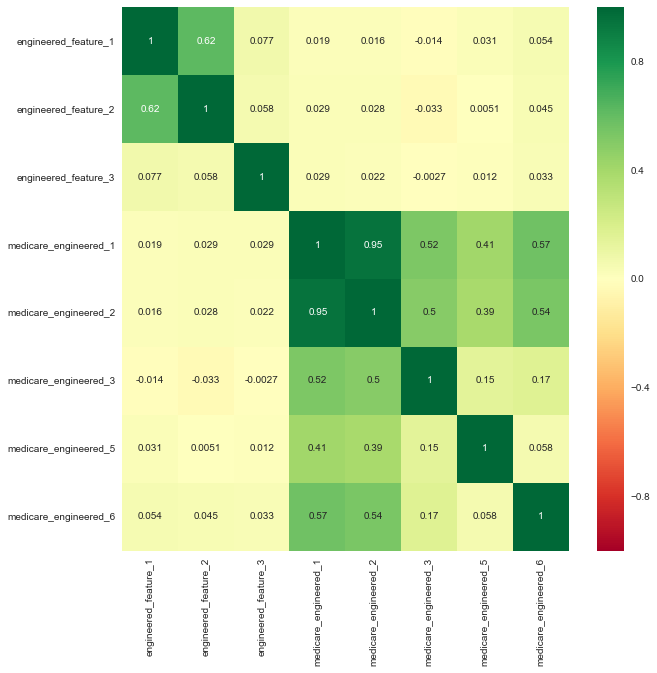

In [25]:
engineered_lst = [i for i in data.columns if 'engineered' in i]
corrmat = data[engineered_lst].corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

The heatmap shows that:
1. engineered feature 1 is highly correlated with engineered feature 2
2. medicare_egineered 1 is highly correlated with medicare_egineered 2
3. Both medicare feature 1 and 2 have some correlation with the rest of medicare features

That Lasso regression drops medicare feature 1 and 2 may be because the two feature can be represented by the linear combination of the rest of medicare features due to high correlation among them.

In the following analysis, I will use the 15 features.

* Split the dataset

In [27]:
from sklearn.model_selection import train_test_split
X_new = model.transform(X)
x_train, x_test, y_train, y_test = train_test_split(X_new, y, test_size=0.25, 
                                                    random_state=42)

/Users/zhenglu/anaconda/lib/python3.6/site-packages/sklearn/utils/__init__.py:93: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(mask.dtype, np.int):


## Model Building

### 1. Simple linear model

In [30]:
# Build a simple linear regression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(x_train, y_train)
pre_train = reg.predict(x_train)
pre_test = reg.predict(x_test)
in_sample_accuracy = mean_squared_error(y_train, pre_train)
out_sample_accuracy = mean_squared_error(y_test, pre_test )
print('===========Mean Squared error of Linear Regression=========')
print('in-sample: ', in_sample_accuracy)
print('out-sample: ', out_sample_accuracy)

===========Mean Squared error of Linear Regression=========
in-sample:  0.023299830491719964
out-sample:  0.023045781718318944


I choose mean squared error as the metric to evaluate the model, as it's a regression problem with continuous response variable. If it is a classification problem, I will use accuracy, AUC, AOC to evaluate the model. 

What's more, I noticed that in my previous attempt, the model performs very bad on testset. That's because I did not remove outliers from the data set, and it turn out that outlire was in the testset, resulting in a much larger error than the trainset. After removing the outlier, errors on the two dataset are small and close, indicating that the linear model has a good performance. It also shows that Linear regression is sensitive to outlier.

To get a better estimation of the model quality, we could conduct cross-validation to mitigate sampling error.

### 2. Cross validation

In [31]:
from sklearn.model_selection import cross_validate
clf = LinearRegression()
cv = cross_validate(clf, x_train, y_train, scoring='neg_mean_squared_error', cv=10)
cv['test_score'].mean()

-0.02350878294537543

The average mean squared error of 10-fold cv is close to the one we get above.

### 3. More models 

In [32]:
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor().fit(x_train, y_train)

pre_train = random_forest.predict(x_train)
pre_test = random_forest.predict(x_test)
in_sample_accuracy = mean_squared_error(y_train,pre_train)
out_sample_accuracy = mean_squared_error(y_test, pre_test)
print('===========Mean Squared error of Random Forest=========')
print('in-sample: ', in_sample_accuracy)
print('out-sample: ', out_sample_accuracy)

===========Mean Squared error of Random Forest=========
in-sample:  1.5351858534825114e-06
out-sample:  5.079004329004374e-06


The result show that random forest regressor model performs better on both train and test dataset than linear regression. And I pick mean squared error as my metric for the same reason that the response is continuous, and also, it is more convinient to compare the performance of different models with the same metric.  

Also, 10-fold cross validation is conducted to get a better estimation of model quality.

In [33]:
model_rf = RandomForestRegressor()
cv = cross_validate(model_rf, x_train, y_train, scoring='neg_mean_squared_error', cv=10)
cv['test_score'].mean()

-9.588631736429543e-06

* show feature importance using random forest

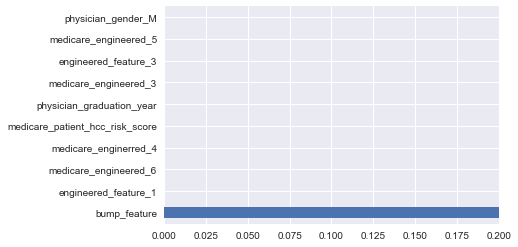

In [34]:
# Output the importance of features.
feat_importances = pd.Series(random_forest.feature_importances_, index = feature_selected)
feat_importances.nlargest(10).plot(kind='barh')
plt.xlim(0,0.2)
plt.show()

I output the top 10 important feature. The plot suggests that *bump feature* is the most predictive feature, followed by a bunch of egineered features. And all the numerical features perform better than binary features. 

### 4. Model comparisom


|   | Train  | 10-fold cv | Test |  
|---|---|---|---|  
| Linear Regression  | 0.02319  | 0.02347   | 0.02362  |  
| Random Forest Regressor  | $1.49801e^{-6}$  | $6.99294e^{-6}$  | $6.54840e^{-6}$  |  

The table above summarizes the model performance on train/test dataset as well as cross-validation results. It indicates that cross validation does help us understand the preformance of the model. For random forest regressor, we can see that the model performance on train data is quite good, but it does not perform well on test data. Without cross validation, we may interprete it as overfitting, but it turns out that the difference is just due to the variation brought by sampling. By conducting cross validation, we are able to use every data point to train and test the model.

I will choose random forest regressor based on the MSE. Under the circumstances where a model is developed for internal use or where you do not need to explain the mechanism behind the model to clients without relevant background), I would recommend the model with better performance regardless of its interpretability. In our case, the random forest regressor outperforms linear regression significantly, so rf is a better option here.